# Proyek Analisis Data: Air Quality Dataset

* Nama: Patricia Chrissanty Indarto
* Email: m232d4kx1928@bangkit.academy
* ID Dicoding: patricia_chrissanty



## Menentukan Pertanyaan Bisnis

* Apa jenis polusi udara yang paling tinggi yang mencemari kota Wanshouxigong dalam 5 tahun terakhir?
* Bagaimana trend perubahan suhu dan dew point dari tahun ke tahun?
* Bagaimana korelasi antara suhu udara dan dew point? Apakah dew point mempengaruhi suhu udara?



## Import Semua Packages/Library yang Digunakan

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [80]:
df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

In [81]:
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


### Assessing data

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [83]:
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [84]:
print("Banyak duplikasi pada data: ", df.duplicated().sum())

Banyak duplikasi pada data:  0


In [85]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


In [86]:
print(df.dtypes)

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


### Cleaning data

In [87]:
df.fillna(method = "ffill", inplace=True)

In [88]:
df.isna().sum().values.sum()

0

## Exploratory Data Analysis (EDA)

### Explore ...

**Jenis polusi udara tertinggi**

In [89]:
#Mencari rata-rata setiap jenis polusi udara selama 5 tahun terakhir
air_polution = df.groupby(by = ['year'] ).agg({
            "PM2.5" : "mean",
            "PM10" : "mean",
            "SO2" : "mean",
            "NO2" : "mean",
            "CO" : "mean",
            "O3" : "mean"})
air_polution = air_polution.reset_index()
air_polution = air_polution.drop('year', axis=1)
air_polution = air_polution.mean()

In [90]:
#Mencari jenis polusi udara yang memiliki rata-rata tertinggi
highest_air_pollution = air_polution.idxmax()

print("Jenis polusi udara yang mencemari paling tinggi :", highest_air_pollution)

Jenis polusi udara yang mencemari paling tinggi : CO


**Rata-rata suhu dan dew point tiap tahun**

In [91]:
temp_dewp = df.groupby(by = ['year'] ).agg({
            "TEMP" : "mean",
            "DEWP" : "mean"})
temp_dewp.head(5)

,TEMP,DEWP
year,,
2013,15.854153,5.750027
2014,14.292637,3.012842
2015,13.563500,2.820925
2016,13.873747,2.300467
2017,0.665657,-13.185381


**Korelasi suhu udara dan dew point**

In [92]:
dewpoint_suhu = df[['TEMP', 'DEWP']].copy()

korelasi_dewpoint_suhu = dewpoint_suhu.corr(method = "pearson")
korelasi_dewpoint_suhu

,TEMP,DEWP
TEMP,1.000000,0.817583
DEWP,0.817583,1.000000


In [93]:
korelasi = round(df['DEWP'].corr(df['TEMP'], method ="pearson"),3)
korelasi

0.818

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa jenis polusi udara yang paling tinggi yang mencemari kota Wanshouxigong dalam 5 tahun terakhir?

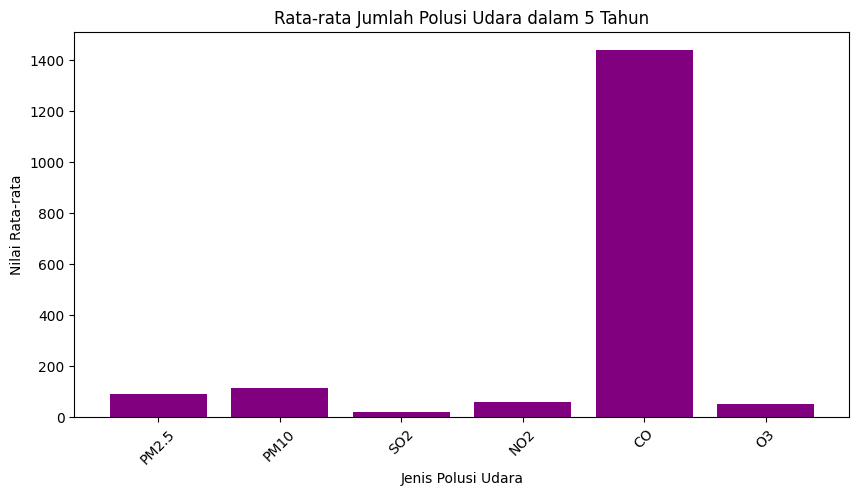

In [94]:
#Memvisualisasikan rata-rata setiap jenis polusi
plt.figure(figsize=(10, 5))
plt.bar(air_polution.index, air_polution.values, color='purple')
plt.xlabel('Jenis Polusi Udara')
plt.ylabel('Nilai Rata-rata')
plt.title('Rata-rata Jumlah Polusi Udara dalam 5 Tahun')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Bagaimana trend perubahan suhu dan dew point dari tahun ke tahun?

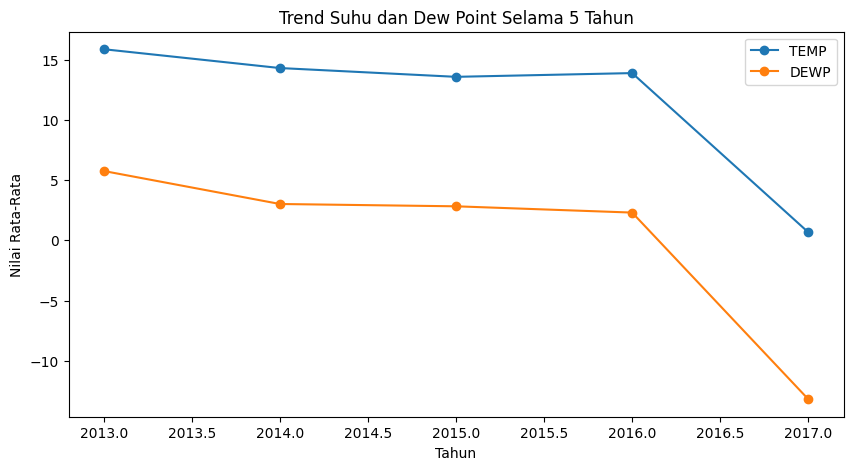

In [95]:
plt.figure(figsize=(10, 5))
for column in temp_dewp.columns:
    plt.plot(temp_dewp.index, temp_dewp[column], label=column, marker='o')

plt.title('Trend Suhu dan Dew Point Selama 5 Tahun')
plt.xlabel('Tahun')
plt.ylabel('Nilai Rata-Rata')
plt.legend()
plt.show()

### Pertanyaan 3: Bagaimana korelasi antara suhu udara dan dew point? Apakah dew point mempengaruhi suhu udara?

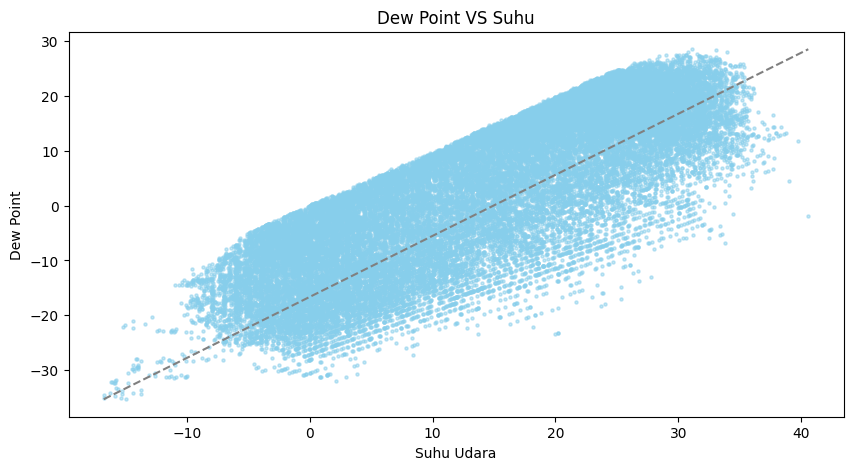

In [96]:
#Korelasi dew point dan suhu udara menggunakan scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(df['TEMP'], df['DEWP'], color="skyblue", marker='o', s = 5, alpha = 0.5,)
plt.plot([df['TEMP'].min(), df['TEMP'].max()], [df['DEWP'].min(), df['DEWP'].max()],color='grey', linestyle='--')
plt.xlabel("Suhu Udara")
plt.ylabel("Dew Point")
plt.title("Dew Point VS Suhu")
plt.show()

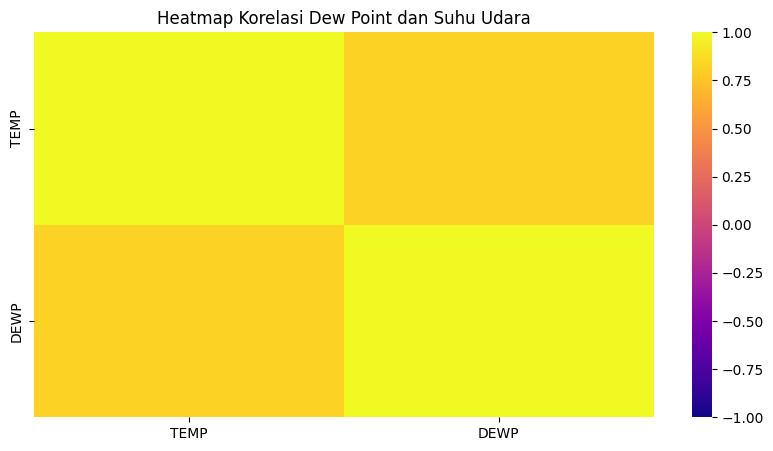

In [97]:
#Korelasi dew point dan suhu udara menggunakan heatmap
fig, cor = plt.subplots(figsize=(10, 5))
sns.heatmap(korelasi_dewpoint_suhu, vmax = 1, vmin = -1, center = 0, cmap = "plasma")
cor.set_title("Heatmap Korelasi Dew Point dan Suhu Udara", loc="center")

plt.show()

## Conclusion

* Terdapat 6 jenis polusi udara, yaitu PM2.5, PM10, SO2, NO2, CO dan O3. Dari keenam jenis tersebut, jenis polusi udara yang paling tinggi mencemari kota Wanshouxigong adalah CO. Hal ini dapat terlihat dari nilai rata-rata selama 5 tahun bahwa terdapat kndungan CO paling tinggi mencemari udara.
* Trend perubahan suhu udara dan dew point di kota Wanshouxigong cenderung stabil setiap tahunnya, kecuali pada tahun 2017 dimana suhu dan dew point mengalami penurunan yang cukup drastis. Dapat terlihat juga pada grafik bahwa trend suhu dan dew point memiliki trend yang sngat mirip.
* Suhu dan dew point memiliki tingkat korelasi yang tinggi dengan nilai korelasi 0.818, dimana artinya suhu udara dan dew point berkaitan dan saling mempengaruhi satu sama lain.

## Streamlit

In [98]:
!pip install -q streamlit

In [99]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 1.098s

3 packages are looking for funding
  run `npm fund` for details

found 2 moderate severity vulnerabilities
  run `npm audit fix` to fix them, or `npm audit` for details


In [100]:
import urllib
print("Password/Enpoint IP for localtunnel is:", urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.171.23.9


In [105]:
!streamlit run /content/dashboard_app.py &>/content/logs.txt &

In [106]:
!npx localtunnel --port 8501

npx: installed 22 in 2.056s
your url is: https://hot-camels-press.loca.lt
^C
